# Tutorial 2, Example 1a

In [1]:
import torch
import numpy as np
import matplotlib.pylab as plt

In [3]:
no_epochs = 200
lr = 0.01

SEED = 10
np.random.seed(SEED)

In [4]:
# Given training data
X = np.array([[0.09, -0.44, -0.15],
              [0.69, -0.99, -0.76],
              [0.34, 0.65, -0.73],
              [0.15, 0.78, -0.58],
              [-0.63, -0.78, -0.56],
              [0.96, 0.62, -0.66],
              [0.63, -0.45, -0.14],
              [0.88, 0.64, -0.33]])
Y = np.array([-2.57, -2.97, 0.96, 1.04, -3.21, 1.05, -2.39, 0.66])

# initialize the weights and biases
w = np.array([0.77, 0.02, 0.63])
b = 0.0

In [5]:
# class for a linear neuron
class Linear():
  def __init__(self):
    self.w = torch.tensor(w, dtype=torch.double)
    self.b = torch.tensor(b, dtype=torch.double)

  def __call__(self, x):
    return torch.inner(torch.tensor(x) ,self.w) + self.b

In [6]:
# squared error as the loss function
def loss(predicted_y, target_y):
  return torch.square(predicted_y - torch.tensor(target_y))

In [7]:
# funtion executing a training step
def train_step(model, x, d, learning_rate):
    y = model(x)
    loss_ = loss(y, d)
    grad_w = -(d - y)*x
    grad_b = -(d - y)
    model.w -= learning_rate * grad_w
    model.b -= learning_rate * grad_b

In [8]:
# create a linear neuron
model = Linear()
print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))

w: [0.77 0.02 0.63], b: 0.0


## SGD Training Starts

In [9]:
# keep an index for training
idx = np.arange(len(X))

err = []
for epoch in range(no_epochs):
  np.random.shuffle(idx)
  X, Y = X[idx], Y[idx]
    
  err_ = []
  for p in np.arange(len(X)):
    
    y_ = model(X[p])
    loss_ = loss(y_, Y[p])
    err_.append(loss_)
    
    train_step(model, X[p], Y[p], learning_rate=lr)
    
    if epoch == 0:
      print('epoch: {}'.format(epoch+1))
      print('p: {}'.format(p+1))
      print('x:{}, d:{}'.format(X[p], Y[p]))
      print('y: {}'.format(y_))
      print('se: {}'.format(loss_))
      print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))
 
  err.append(np.mean(err_))
  if epoch%10 == 9:
        print('epoch: %3d, mse: %1.4f'%(epoch+1, err[epoch]))

epoch: 1
p: 1
x:[ 0.34  0.65 -0.73], d:0.96
y: -0.18509999999999996
se: 1.31125401
w: [0.77389334 0.02744315 0.62164077], b: 0.011451000000000001
epoch: 1
p: 2
x:[ 0.15  0.78 -0.58], d:1.04
y: -0.21161098859999997
se: 1.5665300667842692
w: [0.77577076 0.03720572 0.61438143], b: 0.023967109886000003
epoch: 1
p: 3
x:[ 0.63 -0.45 -0.14], d:-2.39
y: 0.4099467147229841
se: 7.839701605288032
w: [0.75813109 0.04980548 0.61830135], b: -0.00403235726122984
epoch: 1
p: 4
x:[ 0.88  0.64 -0.33], d:0.66
y: 0.49095906240076975
se: 0.028574838584426866
w: [0.75961865 0.05088734 0.61774352], b: -0.0023419478852375374
epoch: 1
p: 5
x:[ 0.09 -0.44 -0.15], d:-2.57
y: -0.0490282253406502
se: 6.355298688629111
w: [0.75734978 0.06197961 0.62152497], b: -0.027551665631831035
epoch: 1
p: 6
x:[-0.63 -0.78 -0.56], d:-3.21
y: -0.9010801099529875
se: 5.331111058654709
w: [0.77189597 0.07998919 0.63445493], b: -0.050640864532301155
epoch: 1
p: 7
x:[ 0.96  0.62 -0.66], d:1.05
y: 0.32123231587957524
se: 0.5311023374

In [9]:
print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))
print('mse: %g'%err[-1])

w: [ 0.36871063  2.56587648 -0.21289879], b: -1.1664272930402482
mse: 0.0545477


## Plot learning curves

Text(0, 0.5, 'mean square error')

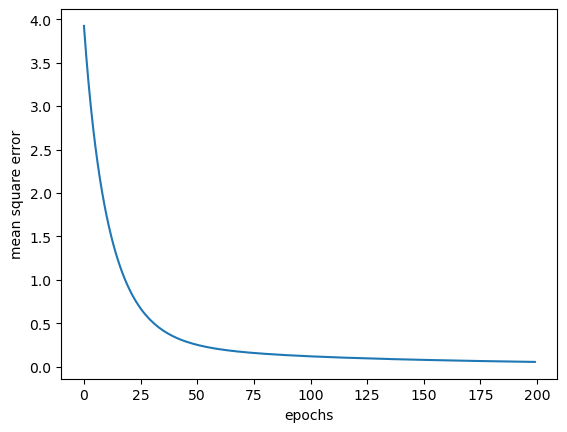

In [10]:
# plot learning curve
plt.figure(1)
plt.plot(range(no_epochs), err)
plt.xlabel('epochs')
plt.ylabel('mean square error')

## Print predictions

In [12]:
# print predictions
for p in np.arange(len(X)):
    y_ = model(X[[p]])
    print('x: %s, d: %g, y: %g'%(X[p], Y[p], y_))


x: [-0.63 -0.78 -0.56], d: -3.21, y: -3.28088
x: [ 0.34  0.65 -0.73], d: 0.96, y: 0.78217
x: [ 0.96  0.62 -0.66], d: 1.05, y: 0.918892
x: [ 0.69 -0.99 -0.76], d: -2.97, y: -3.29043
x: [ 0.88  0.64 -0.33], d: 0.66, y: 0.870456
x: [ 0.15  0.78 -0.58], d: 1.04, y: 1.01374
x: [ 0.09 -0.44 -0.15], d: -2.57, y: -2.23029
x: [ 0.63 -0.45 -0.14], d: -2.39, y: -2.05898
